In [1]:
#Завантаження та підготовка даних.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
#Побудова регресійної моделі.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 2868.55, R^2 = 0.53
Тестові дані: MSE = 2900.19, R^2 = 0.45


In [3]:
#Аналіз перенавчання. Запобігання перенавчанню.
alphas = np.logspace(0, 4, 100)

ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

Найкраще значення alpha для Ridge: 1.0
Найкраще значення alpha для Lasso: 1.0


In [4]:
#Оцінка результатів.
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 3077.42, R^2 = 0.42
Lasso Regression: MSE = 3403.58, R^2 = 0.36


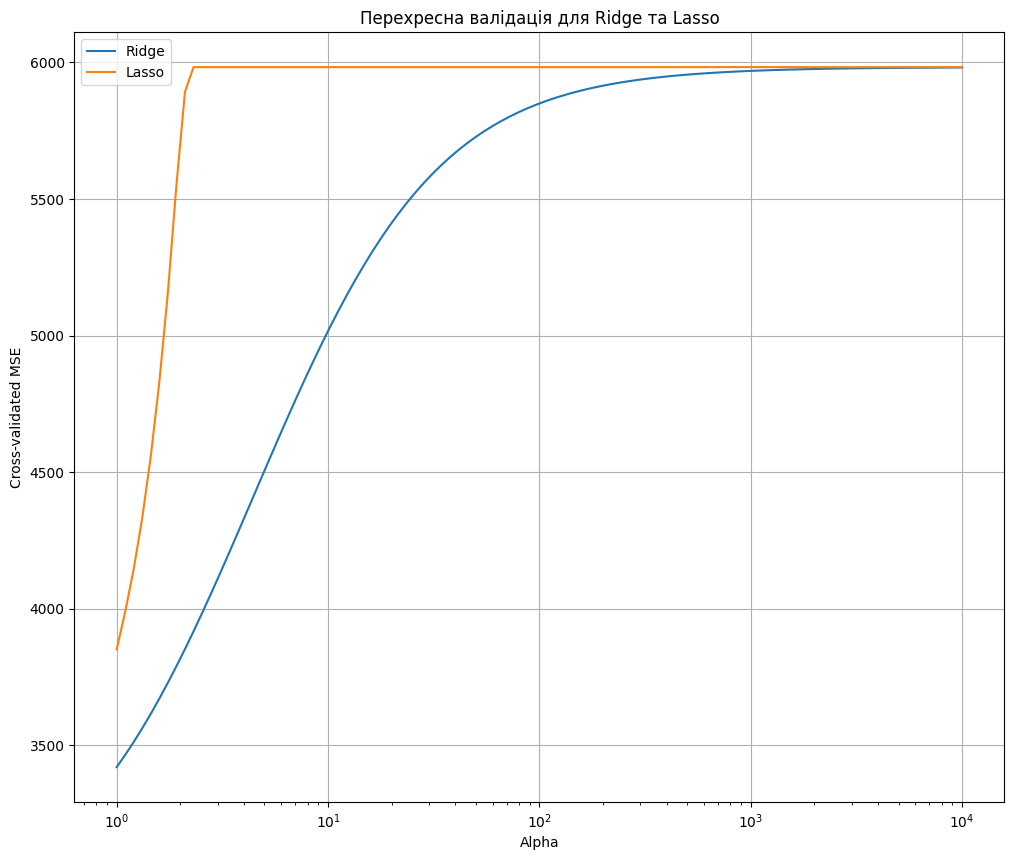

In [5]:
#Візуалізація та висновки.
plt.figure(figsize=(12, 10))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Висновок: Регуляризація дещо підвищила продуктивність моделі, знизивши перенавчання та значення MSE.
#Хоча покращення було незначним, застосування Ridge та Lasso регресій підкреслило важливість налаштування моделей для досягнення оптимальних результатів.
#Lasso регресія, завдяки своїй здатності відбирати ознаки, може бути особливо корисною у задачах з великою кількістю параметрів.

In [8]:
#Виконати кластеризацію даних.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

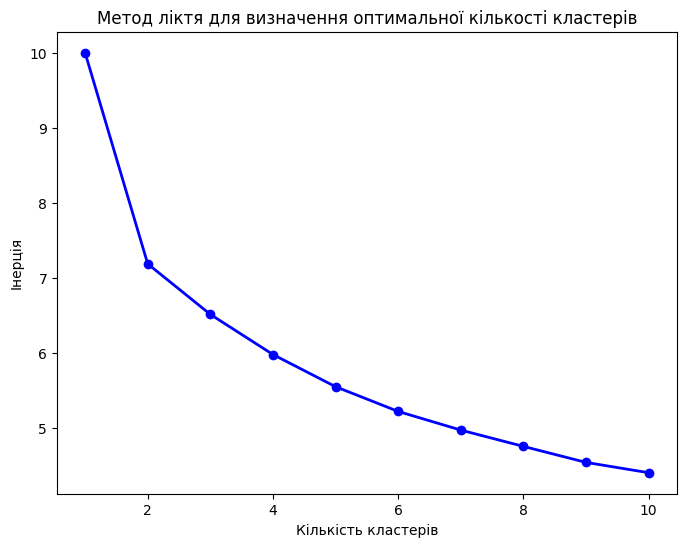

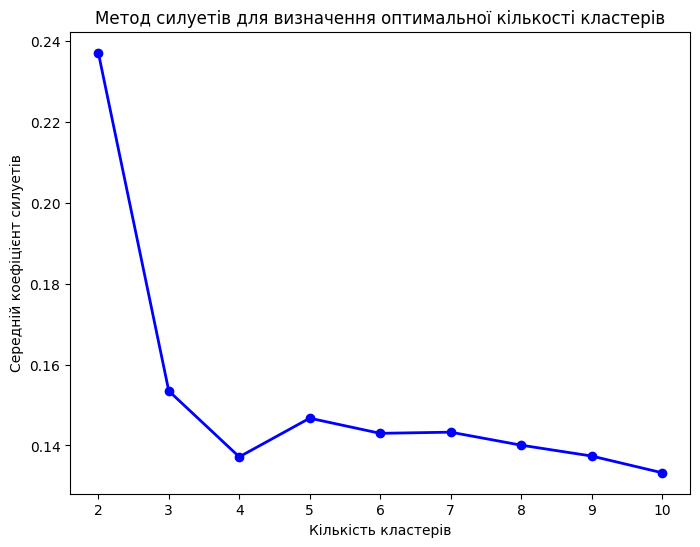

In [10]:
#Застосувати метод ліктя або метод силуєтів.
from sklearn.metrics import silhouette_score
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-', linewidth=2)
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуетів')
plt.show()

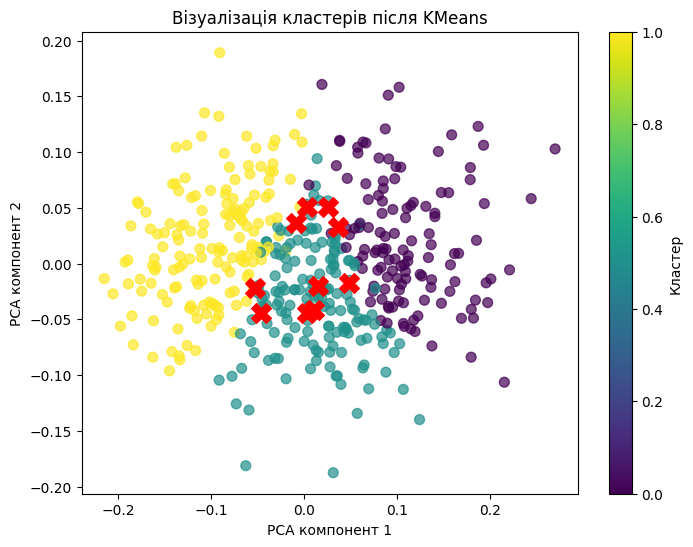

In [14]:
#Зробити візуалізацію кластерів.
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')  # Центроїди кластерів
plt.title('Візуалізація кластерів після KMeans')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.colorbar(label='Кластер')
plt.show()

In [ ]:
#Висновок: Метод ліктя допоміг вибрати оптимальну кількість кластерів, спираючись на різке зменшення інерції (сумарної відстані від точок до центрів кластерів).
#Цей метод показав, що після певної кількості кластерів приріст від додавання нових кластерів стає мінімальним.
#Оптимальна кількість кластерів (3) дозволяє досягти балансу між точністю та простотою моделі.
#Метод силуетів показав, що середній коефіцієнт силуетів для трьох кластерів був найбільш високим, що свідчить про хороше розділення кластерів і належність точок до своїх кластерів.
#Вищий коефіцієнт силуетів означає кращу кластеризацію, що підтверджує вибір трьох кластерів.
#Візуалізація кластерів після використання алгоритму KMeans дозволила візуально оцінити, як дані групуються у тривимірному просторі.
#Після зменшення вимірів за допомогою PCA ми побачили, що кожен кластер добре відокремлений від інших. Це означає, що модель ефективно виявила природні групи в даних.
#Червоні центроїди на графіку демонструють середні точки кожного кластера.
#Їхня позиція вказує на типові значення для кожної групи, що може бути корисним для подальшого аналізу характерних особливостей кожного кластеру.
#Кластеризація може бути корисною для поділу пацієнтів із діабетом на різні групи для персоналізованого лікування або аналізу.
#Наприклад, кожен кластер може представляти різний рівень ризику або інші медичні показники, які впливають на підхід до лікування.

#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning